# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies
import requests
import json
import numpy as np
import random
import time
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
from scipy.stats import linregress
from config_ba import weather_api_key
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#prototype proof of concept 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "New York City"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}" 
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json


{'coord': {'lon': -74.006, 'lat': 40.7143},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 64.58,
  'feels_like': 61.68,
  'temp_min': 63,
  'temp_max': 66.2,
  'pressure': 1012,
  'humidity': 20},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 0},
 'clouds': {'all': 1},
 'dt': 1619907400,
 'sys': {'type': 1,
  'id': 4610,
  'country': 'US',
  'sunrise': 1619862853,
  'sunset': 1619913106},
 'timezone': -14400,
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

In [4]:
lon = weather_json["coord"]["lon"]
lat = weather_json["coord"]["lat"]
temp = weather_json["main"]["temp"]
humidity = weather_json["main"]["humidity"]
cloudiness = weather_json["clouds"]["all"]
wind_speed = weather_json["wind"]["speed"]
name = weather_json["name"]
print(f"The temperature is currently {temp}F. in {name}.")
print(f"The barometer is currently at {humidity}% in {name}.")
print(f"There is {cloudiness}% cloud cover currently in {name}.")
print(f"The wind is currently blowing at {wind_speed} mph in {name}.")
print(f"The latitude of {name} is {lat}.")
print(f"The longitude of {name} is {lon}.")

The temperature is currently 64.58F. in New York.
The barometer is currently at 20% in New York.
There is 1% cloud cover currently in New York.
The wind is currently blowing at 6.91 mph in New York.
The latitude of New York is 40.7143.
The longitude of New York is -74.006.


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [6]:
cities

['bulawayo',
 'tshane',
 'puerto ayora',
 'hilo',
 'qaanaaq',
 'amderma',
 'tazovskiy',
 'kharan',
 'ponta do sol',
 'liesveld',
 'richards bay',
 'polunochnoye',
 'tura',
 'yellowknife',
 'caceres',
 'bluff',
 'albany',
 'port elizabeth',
 'hamilton',
 'jamestown',
 'georgetown',
 'avarua',
 'meulaboh',
 'chokurdakh',
 'barrow',
 'new norfolk',
 'elizabeth city',
 'vestmannaeyjar',
 'lamesa',
 'ngukurr',
 'vaini',
 'porbandar',
 'quchan',
 'mataura',
 'kodiak',
 'ribeira grande',
 'talnakh',
 'hermanus',
 'bredasdorp',
 'ushuaia',
 'manta',
 'faanui',
 'hobart',
 'rikitea',
 'surovatikha',
 'gat',
 'sao filipe',
 'busselton',
 'los llanos de aridane',
 'airai',
 'jiddah',
 'sukhumi',
 'kegayli',
 'solnechnyy',
 'atuona',
 'mys shmidta',
 'litovko',
 'kampot',
 'uwayl',
 'thompson',
 'emba',
 'oktyabrskiy',
 'derzhavinsk',
 'tuktoyaktuk',
 'altamont',
 'butaritari',
 'chuy',
 'kavieng',
 'taolanaro',
 'lavrentiya',
 'bengkulu',
 'kogon',
 'pogar',
 'mindelo',
 'san mateo ixtatan',
 'la

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [7]:
#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
#     query_url = url + "appid=" + weather_api_key + "&q=" + city
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}" 
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")


Processing record 1|bulawayo
Processing record 2|tshane
Processing record 3|puerto ayora
Processing record 4|hilo
Processing record 5|qaanaaq
City not found. skipping.
Processing record 6|tazovskiy
Processing record 7|kharan
Processing record 8|ponta do sol
Processing record 9|liesveld
Processing record 10|richards bay
Processing record 11|polunochnoye
Processing record 12|tura
Processing record 13|yellowknife
Processing record 14|caceres
Processing record 15|bluff
Processing record 16|albany
Processing record 17|port elizabeth
Processing record 18|hamilton
Processing record 19|jamestown
Processing record 20|georgetown
Processing record 21|avarua
Processing record 22|meulaboh
Processing record 23|chokurdakh
Processing record 24|barrow
Processing record 25|new norfolk
Processing record 26|elizabeth city
Processing record 27|vestmannaeyjar
Processing record 28|lamesa
City not found. skipping.
Processing record 29|vaini
Processing record 30|porbandar
Processing record 31|quchan
Processing

Processing record 248|parrsboro
Processing record 249|honiara
Processing record 250|porto santo
Processing record 251|lerwick
Processing record 252|aloleng
Processing record 253|chara
Processing record 254|irbeyskoye
Processing record 255|kerouane
City not found. skipping.
Processing record 256|kamaishi
Processing record 257|aquiraz
Processing record 258|opuwo
Processing record 259|kirov
Processing record 260|taoudenni
Processing record 261|nanortalik
Processing record 262|aitape
Processing record 263|gravdal
Processing record 264|vardo
Processing record 265|buraydah
Processing record 266|takoradi
Processing record 267|phalaborwa
Processing record 268|auki
Processing record 269|rongcheng
Processing record 270|bamako
City not found. skipping.
Processing record 271|san cristobal
Processing record 272|saskylakh
Processing record 273|quatre cocos
City not found. skipping.
Processing record 274|maneromango
Processing record 275|lorengau
City not found. skipping.
Processing record 276|satipo

Processing record 491|maamba
Processing record 492|tashtyp
Processing record 493|saint-joseph
Processing record 494|maicao
Processing record 495|constantine
Processing record 496|haines junction
Processing record 497|biloela
Processing record 498|campoverde
Processing record 499|isiro
Processing record 500|nioro
Processing record 501|skwierzyna
City not found. skipping.
Processing record 502|yongan
Processing record 503|almaznyy
Processing record 504|doha
Processing record 505|rapid valley
Processing record 506|zdvinsk
Processing record 507|san ramon
Processing record 508|mosquera
Processing record 509|port augusta
Processing record 510|conceicao do araguaia
Processing record 511|kolyvan
City not found. skipping.
Processing record 512|rosarito
Processing record 513|bilibino
Processing record 514|port-gentil
Processing record 515|muli
City not found. skipping.
Processing record 516|enshi
Processing record 517|sabha
Processing record 518|lahat
Processing record 519|broken hill
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -8.145, 'lon': 159.5921},
 'dt': 1619907827,
 'id': 2109528,
 'main': {'feels_like': 88,
          'grnd_level': 1009,
          'humidity': 74,
          'pressure': 1012,
          'sea_level': 1012,
          'temp': 82.31,
          'temp_max': 82.31,
          'temp_min': 82.31},
 'name': 'Buala',
 'sys': {'country': 'SB', 'sunrise': 1619897044, 'sunset': 1619939584},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 46, 'gust': 3.96, 'speed': 2.89}}


In [9]:
city_data_df = pd.DataFrame(
                {'City':city_name,
                 'Latitude': lat,
                 'Longitude': lng,
                 'Temperature (max)': max_temp,
                 'Humidity': humidity,
                 'Cloudiness': cloudiness,
                 'Wind Speed': wind_speed,
                 'Country': country,
                 'Date': date
                    
                
                }
)
  

In [10]:
#export to .csv
city_data_df.to_csv("../output_data_file.csv", index = False)

In [11]:
city_data_df.head()

,City,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Country,Date
0,Bulawayo,-20.1500,28.5833,57.67,85,99,15.59,ZW,1619907609
1,Tshane,-24.0196,21.8684,56.39,35,0,9.10,BW,1619907610
2,Puerto Ayora,-0.7393,-90.3518,82.40,65,0,13.80,EC,1619907610
3,Hilo,19.7297,-155.0900,82.40,57,1,9.22,US,1619907401
4,Qaanaaq,77.4840,-69.3632,33.82,68,79,5.32,GL,1619907315


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
city_data_df.describe()

,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.145278,17.740586,61.197756,69.698384,53.542190,7.630144,1.619908e+09
std,33.388250,89.442806,18.611173,21.789763,38.898971,5.360655,9.327184e+01
min,-54.800000,-179.166700,11.460000,3.000000,0.000000,0.400000,1.619907e+09
25%,-8.161400,-63.598600,47.410000,58.000000,11.000000,3.440000,1.619908e+09
50%,25.519800,24.933300,64.710000,74.000000,66.000000,6.240000,1.619908e+09
75%,48.826400,93.600000,77.000000,87.000000,90.000000,10.360000,1.619908e+09
max,78.218600,178.416700,91.720000,100.000000,100.000000,37.980000,1.619908e+09


In [13]:
#  Get the indices of cities that have humidity over 100%.
# skip, no cities over 100%

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# skip, no cities over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

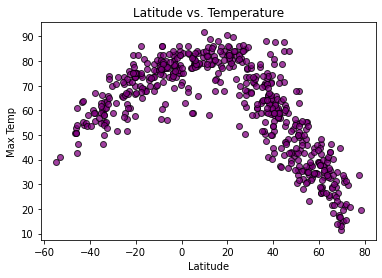

In [23]:
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature (max)'], marker="o", facecolors="purple", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("/Users/Akeyrar/Desktop/Data Analysis Homework /Python-API-Challenge_Final/output_data/latitude_vs_temp.png", bbox_inches="tight")

plt.show()

## Latitude vs. Humidity Plot

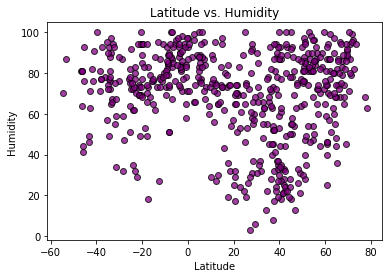

In [25]:
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'], marker="o", facecolors="purple", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("/Users/Akeyrar/Desktop/Data Analysis Homework /Python-API-Challenge_Final/output_data/latitude_vs_humidity.png", bbox_inches="tight")

plt.show()

## Latitude vs. Cloudiness Plot

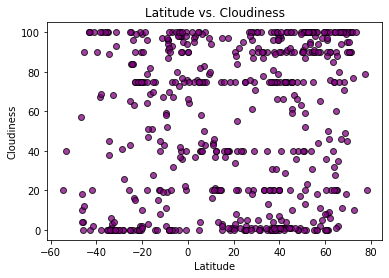

In [26]:
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'], marker="o", facecolors="purple", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("/Users/Akeyrar/Desktop/Data Analysis Homework /Python-API-Challenge_Final/output_data/latitude_vs_cloudiness.png", bbox_inches="tight")

plt.show()

## Latitude vs. Wind Speed Plot

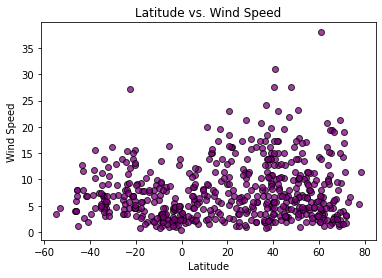

In [39]:
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'], marker="o", facecolors="purple", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("/Users/Akeyrar/Desktop/Data Analysis Homework /Python-API-Challenge_Final/output_data/latitude_vs_windspeed.png", bbox_inches="tight")

plt.show()

## Linear Regression

In [28]:
n_hemi = city_data_df.loc[city_data_df['Latitude'] > 0]
n_hemi

,City,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Country,Date
3,Hilo,19.7297,-155.0900,82.40,57,1,9.22,US,1619907401
4,Qaanaaq,77.4840,-69.3632,33.82,68,79,5.32,GL,1619907315
5,Tazovsky,67.4667,78.7000,28.74,86,100,2.80,RU,1619907611
6,Kharan,28.5833,65.4167,76.86,37,100,3.98,PK,1619907611
7,Ponta do Sol,32.6667,-17.1000,57.99,66,87,1.99,PT,1619907612
...,...,...,...,...,...,...,...,...,...
549,Jammalamadugu,14.8333,78.4000,80.35,73,2,7.61,IN,1619907824
550,Duluth,46.7833,-92.1066,84.20,13,1,21.85,US,1619907664
552,Salalah,17.0151,54.0924,84.20,79,40,3.44,OM,1619907719
553,Andros,37.8333,24.9333,69.01,41,89,10.45,GR,1619907826


In [29]:
s_hemi = city_data_df.loc[city_data_df['Latitude'] < 0]
s_hemi

,City,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Country,Date
0,Bulawayo,-20.1500,28.5833,57.67,85,99,15.59,ZW,1619907609
1,Tshane,-24.0196,21.8684,56.39,35,0,9.10,BW,1619907610
2,Puerto Ayora,-0.7393,-90.3518,82.40,65,0,13.80,EC,1619907610
9,Richards Bay,-28.7830,32.0377,62.80,87,41,4.72,ZA,1619907613
14,Bluff,-46.6000,168.3333,51.01,81,57,4.00,NZ,1619907615
...,...,...,...,...,...,...,...,...,...
544,Olinda,-8.0089,-34.8553,71.60,94,90,8.05,BR,1619907822
547,San Juan,-31.5375,-68.5364,72.86,34,93,10.65,AR,1619907824
551,Maragogi,-9.0122,-35.2225,76.91,86,97,9.44,BR,1619907825
555,Charters Towers,-20.1000,146.2667,66.97,77,1,9.01,AU,1619907827


In [30]:
n_hemi.describe()

,Latitude,Longitude,Temperature (max),Humidity,Cloudiness,Wind Speed,Date
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,3.740000e+02
mean,39.876405,12.115901,57.320160,66.457219,55.213904,8.295267,1.619908e+09
std,19.603676,86.341050,20.488094,23.507161,38.603535,5.799326,9.356171e+01
min,0.048700,-179.166700,11.460000,3.000000,0.000000,0.780000,1.619907e+09
25%,25.288375,-68.485625,39.200000,51.000000,18.500000,3.537500,1.619908e+09
50%,40.560150,26.141650,59.000000,72.000000,71.000000,6.845000,1.619908e+09
75%,55.254000,80.076475,77.245000,86.000000,91.750000,11.500000,1.619908e+09
max,78.218600,178.416700,91.720000,100.000000,100.000000,37.980000,1.619908e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8611705286338935


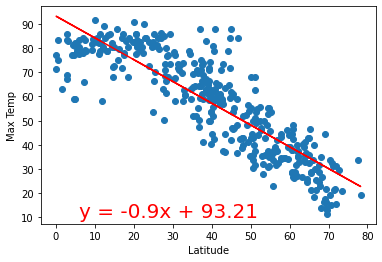

In [31]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Temperature (max)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.798157923273307


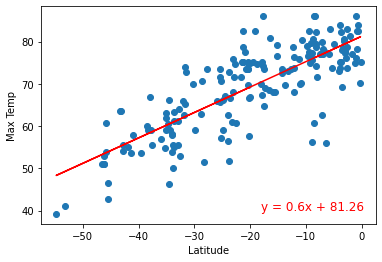

In [32]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Temperature (max)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-18,40),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08144435663229611


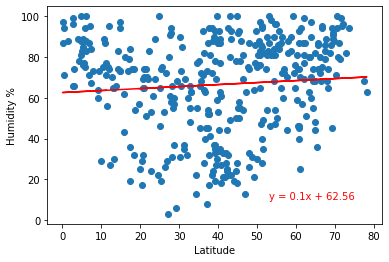

In [33]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(53,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue}")
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2368748354161137


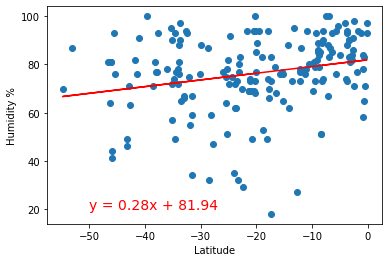

In [34]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue}")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14242838240505842


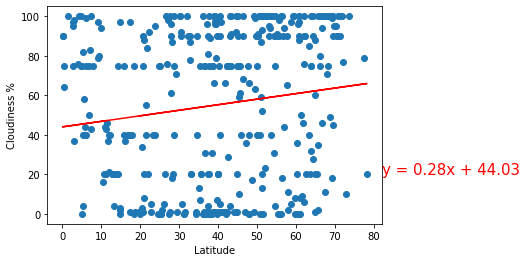

In [35]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(82,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue}")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24044462279030826


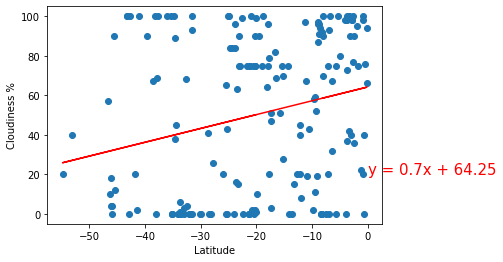

In [36]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02085028235095394


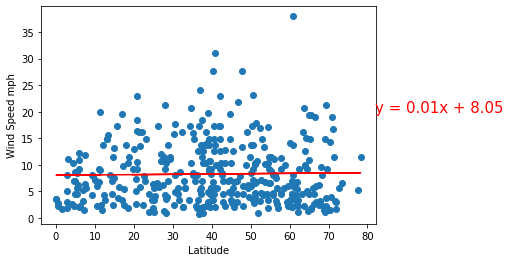

In [37]:
x_values = n_hemi['Latitude']
y_values = n_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(82,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
print(f"The r-squared is: {rvalue}")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23019163342461393


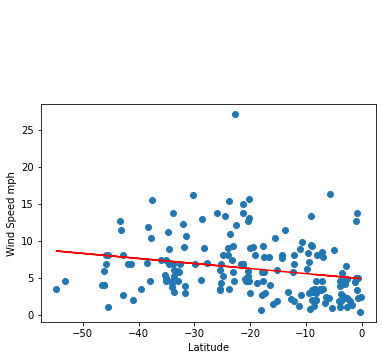

In [38]:
x_values = s_hemi['Latitude']
y_values = s_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
print(f"The r-squared is: {rvalue}")
plt.show()